* especial para clasificación
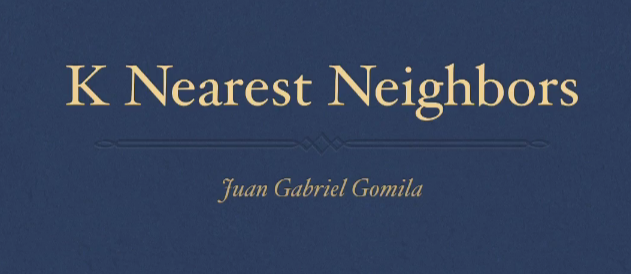


The answer to this question, as the answer often is in data science is “It depends.” kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. If you have a larger dataset with a binary classification, a simple logistic regression may be a better choice. In other cases, a random forest classifier could be a better choice. If you have the time, it’s always a good idea to try out as many models as possible to get the most accurate predictions in machine learning.

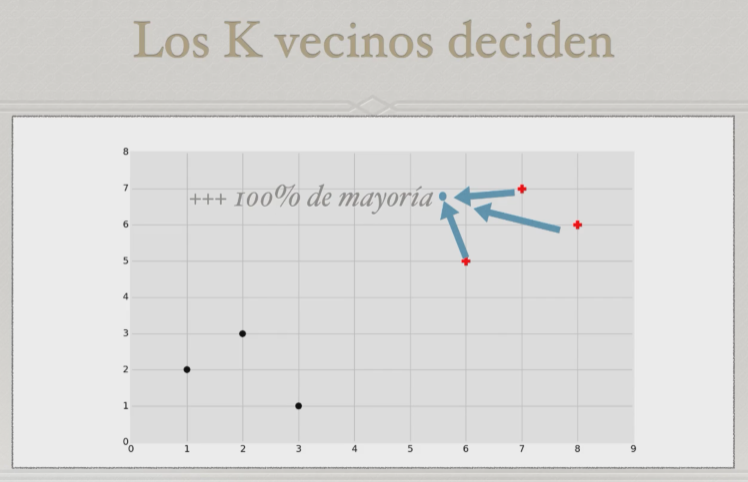

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.describe()

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
df.columns=['name', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'class']

In [5]:
df.head()

,name,v1,v2,v3,v4,v5,v6,v7,v8,v9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.drop("name", axis=1, inplace=True)

In [7]:
df.replace("?", -99999, inplace=True)

In [8]:
x = df[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y = df['class']

### ¿qué datos contiene el target?

In [9]:
y.unique()

array([2, 4], dtype=int64)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [12]:
accu = clf.score(x_test, y_test)
accu

0.9857142857142858

## ahora hago un GridSearchCV

In [13]:
x = df[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9']]
y = df['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
params = {
    'n_neighbors':[3, 5, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric':['euclidean', 'manhattan']
}

In [15]:
clf = neighbors.KNeighborsClassifier()
gs = GridSearchCV(clf, params, verbose=1, cv=3, n_jobs=1)
res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


In [16]:
res

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 15, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

## resultados:

In [17]:
gs.best_score_

0.9624326759051617

In [18]:
gs.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [19]:
gs.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

## creo el modelo con los parámetros de GridSearchCV
## <font color='red'> ojo: sale mejor score sin el Grid ¿¿??</font>

In [20]:
clf = neighbors.KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='uniform')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9785714285714285

## predicción:

In [21]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1])
sample_measure = sample_measure.reshape(1,-1)

In [23]:
res=clf.predict(sample_measure)
print("el nuevo paciente es del grupo: ", res)

el nuevo paciente es del grupo:  [2]


In [24]:
sample_measure = np.array([[4,2,1,1,1,2,3,2,1], [4,2,2,2,2,3,4,2,2]]).reshape(2, -1)
res = clf.predict(sample_measure)
print("los pacientes ingresan a los grupos: ", res)

los pacientes ingresan a los grupos:  [2 2]
